In [1]:
import joblib 
import numpy as np
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import hist
from hist import Hist 
from uncertainties import ufloat, unumpy
import os, sys
sys.path.append("../core")

from utils import *

In [2]:
period = "A" 
pythia_path = f'/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/tmp/pythia{period}_pred.pkl'
pythia_pd = joblib.load(pythia_path)
pythia_pd = pythia_pd[(pythia_pd["jet_nTracks"] > 1) & (pythia_pd["target"] != '-')] 


In [3]:
data_period = "1516"
data_path = f'/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/tmp/data{data_period}_pred.pkl'
data_pd = joblib.load(data_path)
data_pd = data_pd[(data_pd["jet_nTracks"] > 1)] 

In [4]:
reweight_file_path = '/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/NewWorkflow/test_reweight/test_reweight_factor2.pkl'
reweight_file_path = Path(reweight_file_path)
reweight_factor = joblib.load(reweight_file_path)

In [5]:
reweighted_data_pd = attach_reweight_factor(data_pd, reweight_factor)
reweighted_pythia_pd = attach_reweight_factor(pythia_pd, reweight_factor)

In [7]:
reweighted_pythia_pd

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,event_weight,...,is_leading,pt_idx,target,GBDT_newScore,jet_nTracks_quark_reweighting_weights,jet_nTracks_gluon_reweighting_weights,jet_trackBDT_quark_reweighting_weights,jet_trackBDT_gluon_reweighting_weights,GBDT_newScore_quark_reweighting_weights,GBDT_newScore_gluon_reweighting_weights
53939,364707.0,15450286.0,554.589966,1.039075,20.0,0.061749,0.199279,-0.024167,21.0,0.002462,...,0.0,0,1,-0.189685,0.002462,0.002462,0.002462,0.002462,0.002462,0.002462
72879,364707.0,12004426.0,582.164856,-0.601817,21.0,0.025921,0.223785,0.227491,21.0,0.005609,...,0.0,0,1,1.010659,0.005609,0.005609,0.005609,0.005609,0.005609,0.005609
120607,364707.0,14720243.0,544.812134,1.529484,11.0,0.024930,0.126167,-0.292486,1.0,0.006114,...,0.0,0,0,-2.082529,0.006114,0.006114,0.006114,0.006114,0.006114,0.006114
203109,364707.0,12634591.0,576.683289,0.778905,6.0,0.021471,0.126657,-0.476749,2.0,0.001317,...,0.0,0,0,-2.955314,0.001317,0.001317,0.001317,0.001317,0.001317,0.001317
34293,364707.0,12187134.0,557.575928,-0.738470,20.0,0.078138,0.272633,0.092275,21.0,0.001952,...,0.0,0,1,0.344464,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,364709.0,6582182.0,1915.680664,0.150024,18.0,0.010675,0.155310,-0.127678,1.0,0.000005,...,1.0,5,0,-2.169957,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005
446,364709.0,6598083.0,1993.789551,-0.140651,50.0,0.178610,0.314267,0.227506,1.0,0.000005,...,1.0,5,0,0.255176,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005
449,364709.0,6593184.0,1634.645508,0.103605,15.0,0.026987,0.211595,-0.195076,2.0,0.000005,...,0.0,5,0,-2.138587,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005
450,364709.0,6594460.0,1659.721680,0.385620,23.0,0.027218,0.203993,0.015940,2.0,0.000006,...,1.0,5,0,-0.673563,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006


In [6]:
joblib.dump(reweighted_pythia_pd, f'pythia{period}_reweighted.pkl')
joblib.dump(reweighted_data_pd, f'data{data_period}_reweighted.pkl')

['data1516_reweighted.pkl']

In [7]:
reweighting_vars = ['jet_nTracks', 'jet_trackBDT', 'GBDT_newScore'] 
all_weight_options = ['event_weight'] + [f'{reweight_var}_{parton}_reweighting_weights' for reweight_var in reweighting_vars for parton in ['quark', 'gluon']]

In [8]:
pythiaA_hists = {}
data1516_hists = {}
for weight in all_weight_options:
    pythiaA_hists[weight] = digitize_pd(reweighted_pythia_pd, weight)
    data1516_hists[weight] = digitize_pd(reweighted_data_pd, weight, data_type= 'Data')

In [13]:
len(pythiaA_hists['event_weight'])

# 7 * 672 = 4k plots 

672

In [ ]:
data1516_hists['event_weight']

In [10]:
joblib.dump(pythiaA_hists, "pythiaA_hists.pkl")
joblib.dump(data1516_hists, "data1516_hists.pkl")

['data1516_hists.pkl']

In [ ]:
all_weight_options

In [ ]:
reweighted_data_pd.head()

In [ ]:
data1516_hists

In [ ]:
reweight_factor[500]['jet_nTracks']['quark_factor']

# Debug reweighting

In [11]:
reweighted_pythia_pd = joblib.load(f'pythia{period}_reweighted.pkl')

In [ ]:
reweighted_pythia_pd.head()

In [12]:
reweighted_pythia_pd_at_pt = reweighted_pythia_pd[reweighted_pythia_pd['pt_idx']==0]

In [13]:
forward = reweighted_pythia_pd_at_pt[reweighted_pythia_pd_at_pt['is_forward']==1]
central = reweighted_pythia_pd_at_pt[reweighted_pythia_pd_at_pt['is_forward']==0]

forward_quark = forward[forward['target']==0]
central_quark = central[central['target']==0]

In [14]:
import hist
from hist import Hist

def make_hist(values, bins, weights):
    # assuming bins numpy array with (start, stop, n_edges)
    _hist = Hist(hist.axis.Regular(bins=len(bins)-1, start=bins[0], stop=bins[-1], overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
    _hist.fill(values, weight=weights)
    
    factor = np.sum(_hist.values())
    _normed_hist = _hist / (factor * _hist.axes[0].widths)

    return _hist, _normed_hist

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x1553fa9ef3d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x1553f9a70520>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x1553fa9ef2b0>, errorbar=<ErrorbarContainer object of 3 artists>))

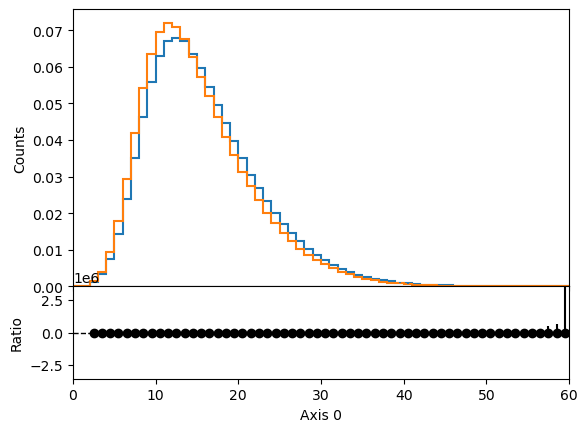

In [15]:
var = 'jet_nTracks'

custom_bins = np.linspace(0,60,61)
weight = 'event_weight'
h1, normed_h1 = make_hist(forward_quark[var], bins = custom_bins, weights=forward_quark[weight])
h2, normed_h2 = make_hist(central_quark[var], bins = custom_bins, weights=central_quark[weight])
normed_h1.plot_ratio(normed_h2)


(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x15537c8b8580>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x15537c8690d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x15537c8b8460>, errorbar=<ErrorbarContainer object of 3 artists>))

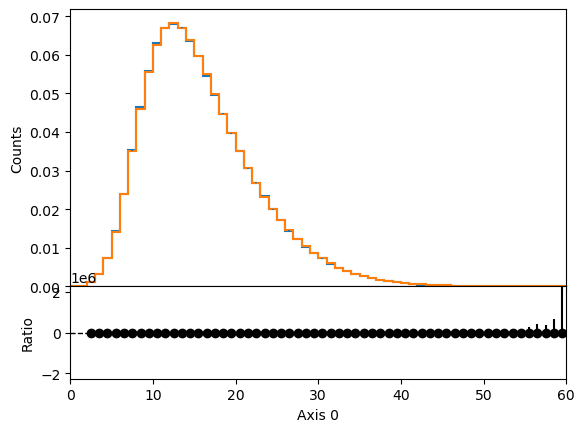

In [16]:
custom_bins = np.linspace(0,60,61)
weight = 'jet_nTracks_quark_reweighting_weights'
h1, normed_h1 = make_hist(forward_quark[var], bins = custom_bins, weights=forward_quark[weight])
h2, normed_h2 = make_hist(central_quark[var], bins = custom_bins, weights=central_quark[weight])
normed_h1.plot_ratio(normed_h2)


(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x15537998f2e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x155379940580>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x1553798ecac0>, errorbar=<ErrorbarContainer object of 3 artists>))

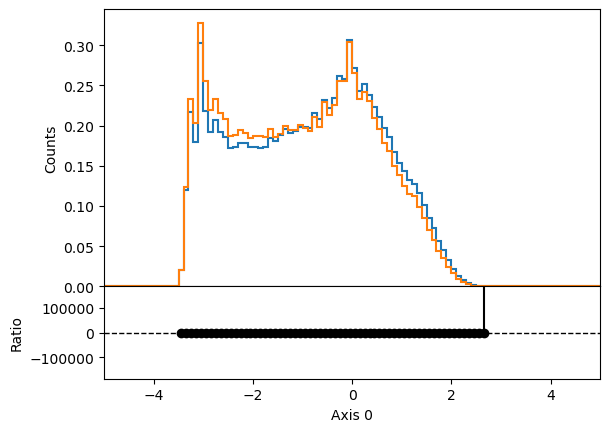

In [18]:
var = 'GBDT_newScore'
custom_bins = np.linspace(-5.0,5,101)
weight = 'GBDT_newScore_quark_reweighting_weights'
h1, normed_h1 = make_hist(forward_quark[var], bins = custom_bins, weights=forward_quark[weight])
h2, normed_h2 = make_hist(central_quark[var], bins = custom_bins, weights=central_quark[weight])
normed_h1.plot_ratio(normed_h2)


In [ ]:
var = 'jet_nTracks'
forward = reweighted_pythia_pd_at_pt[reweighted_pythia_pd_at_pt['is_forward']==1]
central = reweighted_pythia_pd_at_pt[reweighted_pythia_pd_at_pt['is_forward']==0]
plt.hist(forward[var], weights=forward['event_weight'])
plt.hist(central[var], weights=central['event_weight'])
